In [104]:
# Use HMMLearn to experiment with the data
# Matrix Pi, A, and B
 

import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm 
from hmmlearn.hmm import MultinomialHMM 
from hmmlearn.hmm import GaussianHMM 
import warnings
import random
import seaborn as sb

warnings.filterwarnings('ignore')

In [95]:
# inputfile = '../../Data/Columnar Transposition Cipher/text_length_100.txt'

In [159]:
# vigenere cipher: row: key, col plaintext
#
count = 0
cipherText = [] # [12,3,21,23,5....]

# sample.txt: 
# playfair cipher 
# fgtytfcnsokbbadbdkvwfgndshgfrfrfdgmaehnodkvwxozlsokbwaztvmfgmrdgndcnkib
# aydtfugtzztadgcwegbxadfgibiilipwdwxpzjiaxazvtmyjnyhjntyfggadgzyzykmgzdi
# gokxtfvmftgcxrgbytotgspozvkmgmuysvydfgtzvdgwnvxlxpphadbapd 
# key: bjclktfmzeavoidghnprsuwxy, reading from line 37801

with open('sample.txt', "r") as txt: 
    for line in txt:
        for e in line:
            cipherText.append(ord(e) - 97)

N = 26
M = 26

pi = []
total = 0
# initialize pi
for i in range(N):
    pi.append(random.random()) # double between 0 and 1
    total += pi[i]
    
print(cipherText)

# normalize pi matrix
stochastic = 0
for i in range(N):
    pi[i] = pi[i] / total
    stochastic += pi[i]

total_A = 0
total_B = 0
initial_A = [[0] * M for i in range(N)] # throw 0 into the array first
initial_B = [[0] * M for i in range(N)] # throw 0 into the array first
# initialize B and normalize
for i in range(N):
    for j in range(N):
        initial_A[i][j] = random.random()
        total_A += initial_A[i][j]
        initial_B[i][j] = random.random()
        total_B += initial_B[i][j]
    for e in range(N):
        initial_A[i][e] =  initial_A[i][e] / total_A
        initial_B[i][e] =  initial_B[i][e] / total_B
    total_A = 0
    total_B = 0
    
# verify if row stochastic
# for i in range(N):
#     for j in range(N):
#         total += initial_A[i][j]
#     print(total)
#     total = 0


[5, 6, 19, 24, 19, 5, 2, 13, 18, 14, 10, 1, 1, 0, 3, 1, 3, 10, 21, 22, 5, 6, 13, 3, 18, 7, 6, 5, 17, 5, 17, 5, 3, 6, 12, 0, 4, 7, 13, 14, 3, 10, 21, 22, 23, 14, 25, 11, 18, 14, 10, 1, 22, 0, 25, 19, 21, 12, 5, 6, 12, 17, 3, 6, 13, 3, 2, 13, 10, 8, 1, 0, 24, 3, 19, 5, 20, 6, 19, 25, 25, 19, 0, 3, 6, 2, 22, 4, 6, 1, 23, 0, 3, 5, 6, 8, 1, 8, 8, 11, 8, 15, 22, 3, 22, 23, 15, 25, 9, 8, 0, 23, 0, 25, 21, 19, 12, 24, 9, 13, 24, 7, 9, 13, 19, 24, 5, 6, 6, 0, 3, 6, 25, 24, 25, 24, 10, 12, 6, 25, 3, 8, 6, 14, 10, 23, 19, 5, 21, 12, 5, 19, 6, 2, 23, 17, 6, 1, 24, 19, 14, 19, 6, 18, 15, 14, 25, 21, 10, 12, 6, 12, 20, 24, 18, 21, 24, 3, 5, 6, 19, 25, 21, 3, 6, 22, 13, 21, 23, 11, 23, 15, 15, 7, 0, 3, 1, 0, 15, 3]


In [160]:
startprob = np.array(pi)
transmat = np.array(initial_A)
emissionprob = np.array(initial_B)

# The requirement follows from the definition of the 
# Multinomial distribution (see https://en.wikipedia.org/wiki/Multinomial_distribution ). 
# If the sample does not conform to it, need to use 
# LabelEncoder from scikit-learn to manually project it 
# to the required range
from sklearn.preprocessing import LabelEncoder
cipherText = LabelEncoder().fit_transform(cipherText)

# print(cipherText)

h = MultinomialHMM(n_components=N,startprob=startprob,transmat=transmat, n_iter=100)

X = np.array(cipherText)
X = X.reshape(200,1).T
h.fit(X)

MultinomialHMM(algorithm='viterbi',
        init_params='abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ',
        n_components=26, n_iter=100,
        params='abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ',
        random_state=<mtrand.RandomState object at 0x10834aa68>,
        startprob=None, startprob_prior=1.0, thresh=0.01, transmat=None,
        transmat_prior=1.0)

In [161]:
#print(h.decode(X))

In [162]:
#print(transmat)

In [163]:
print(h.emissionprob_)

[[  8.54017711e-18   8.54017711e-18   8.54017711e-18   2.09938345e-11
    8.54017711e-18   8.54017711e-18   1.68527262e-02   8.54017711e-18
    8.54017711e-18   8.54017711e-18   8.54017711e-18   8.54017711e-18
    8.54017711e-18   8.54017711e-18   8.54017711e-18   8.54017711e-18
    1.44058748e-02   8.54017711e-18   2.23666252e-17   7.20293742e-03
    8.54017711e-18   8.54017711e-18   8.54017711e-18   8.54017711e-18
    8.54017711e-18]
 [  8.54017711e-18   8.54017711e-18   8.54017711e-18   8.54017711e-18
    8.54017711e-18   2.62828325e-02   8.54017711e-18   8.54017711e-18
    8.54017711e-18   8.54017711e-18   8.54017711e-18   8.54017711e-18
    4.65092170e-15   8.54017711e-18   2.79905491e-09   8.54017711e-18
    8.54017711e-18   8.54017711e-18   8.54017711e-18   8.54017711e-18
    8.54017711e-18   8.54017711e-18   8.54017711e-18   8.56917100e-18
    1.21787031e-02]
 [  8.54021117e-18   8.54017711e-18   8.54017711e-18   8.54017711e-18
    8.54017711e-18   8.54017711e-18   8.54017715e-

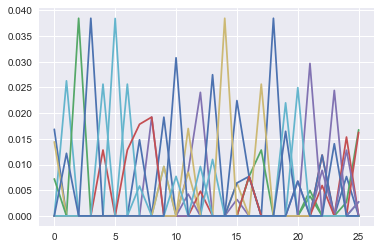

In [168]:
plt.plot(h.emissionprob_)
plt.show()

In [169]:

# plt.plot(h.transmat_)
# plt.show()

# vignere cipher sample
# wnmkakgytcynwoduejaomeybshvtgfumwwgqzbspmdsxrukytunzshmkdilvbmucsennq
# eyisneiiuucsccrhiomtsvpxbdcrozsbqvsmsjjpmgjkpxudejockocouzajymvfzwukj
# wfthxksmjbkmwnwptdkujdsddocrtjkhwjdjlkkxgfjsikmtgcenomwncepfto 
# key: BZKKZQVYCUUVSWLQRQSO, reading from line 12705

# playfair cipher sample
# fgtytfcnsokbbadbdkvwfgndshgfrfrfdgmaehnodkvwxozlsokbwaztvmfgmrdgndcnkib
# aydtfugtzztadgcwegbxadfgibiilipwdwxpzjiaxazvtmyjnyhjntyfggadgzyzykmgzdi
# gokxtfvmftgcxrgbytotgspozvkmgmuysvydfgtzvdgwnvxlxpphadbapd 
# key: bjclktfmzeavoidghnprsuwxy, reading from line 37801

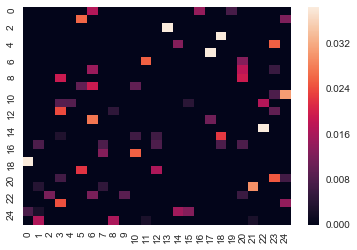

In [170]:
heat_map = sb.heatmap(h.emissionprob_)
plt.show()